#Минимизация гладкой функции

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
%matplotlib inline

In [ ]:
def f(x):
  return np.sin(x/5)*np.exp(x/10)+5*np.exp(-x/2)

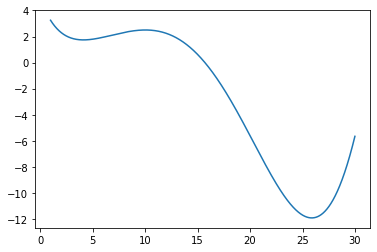

In [ ]:
x = np.arange(1, 30, 0.01)
y = f(x)
fix, ax = plt.subplots()
ax.plot(x,y)
plt.show()

https://docs.scipy.org/doc/scipy/reference/optimize.html


In [ ]:
minimum = optimize.minimize(f, 20)

In [ ]:
for x0 in [2,30]:
  minimum = optimize.minimize(f, x0) #BFGS
  print(x0, round(minimum.fun, 2))

2 1.75
30 -11.9


#Глобальная оптимизация
Теперь попробуем применить к той же функции f(x) метод глобальной оптимизации — дифференциальную эволюцию.
https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.differential_evolution.html#scipy.optimize.differential_evolution

In [ ]:
minimum_diff = optimize.differential_evolution(f, bounds=[(1,30)])

In [ ]:
minimum_diff.fun

array([-11.89889467])

дифференциальная эволюция справилась с задачей поиска глобального минимума на отрезке, т.к. по своему устройству она предполагает борьбу с попаданием в локальные минимумы.Сравните количество итераций, потребовавшихся BFGS для нахождения минимума при хорошем начальном приближении, с количеством итераций, потребовавшихся дифференциальной эволюции. При повторных запусках дифференциальной эволюции количество итераций будет меняться, но в этом примере, скорее всего, оно всегда будет сравнимым с количеством итераций BFGS. Однако в дифференциальной эволюции за одну итерацию требуется выполнить гораздо больше действий, чем в BFGS. Например, можно обратить внимание на количество вычислений значения функции (nfev) и увидеть, что у BFGS оно значительно меньше. Кроме того, время работы дифференциальной эволюции очень быстро растет с увеличением числа аргументов функции.

In [ ]:
minimum_diff, minimum

(     fun: array([-11.89889467])
     jac: array([2.84217094e-06])
 message: 'Optimization terminated successfully.'
    nfev: 96
     nit: 5
 success: True
       x: array([25.88019771]),
       fun: -11.898894665981285
 hess_inv: array([[1.67932484]])
      jac: array([2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([25.88019339]))

#Минимизация негладкой функции
Теперь рассмотрим функцию h(x) = int(f(x)) на том же отрезке [1, 30], т.е. теперь каждое значение f(x) приводится к типу int и функция принимает только целые значения.
Такая функция будет негладкой и даже разрывной, а ее график будет иметь ступенчатый вид. Убедитесь в этом, построив график h(x) с помощью matplotlib.

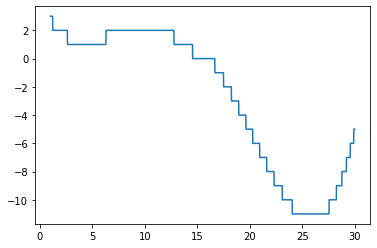

In [ ]:
def h(x):
  return (np.sin(x/5)*np.exp(x/10)+5*np.exp(-x/2)).astype(dtype=int)
x = np.arange(1, 30, 0.01)
y = h(x)
fix, ax = plt.subplots()
ax.plot(x,y)
plt.show()

In [ ]:
minimum_razr_bfgs = optimize.minimize(h, 30)

In [ ]:
minimum_razr_bfgs.fun[0]

-5

In [ ]:
minimum_razr_diff = optimize.differential_evolution(h, [(1,30)])
minimum_razr_diff.fun

-11.0

Обратите внимание на то, что полученные ответы различаются. Это ожидаемый результат, ведь BFGS использует градиент (в одномерном случае – производную) и явно не пригоден для минимизации рассмотренной нами разрывной функции. Попробуйте понять, почему минимум, найденный BFGS, именно такой (возможно в этом вам поможет выбор разных начальных приближений).

Выполнив это задание, вы увидели на практике, чем поиск минимума функции отличается от глобальной оптимизации, и когда может быть полезно применить вместо градиентного метода оптимизации метод, не использующий градиент. Кроме того, вы попрактиковались в использовании библиотеки SciPy для решения оптимизационных задач, и теперь знаете, насколько это просто и удобно.
